# Task 02:
### Prediction about a customer will buy the car or not based on the given parameters in the dataset Using 2 hidden layer neural network.

In [1]:
#Import the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the csv file
df = pd.read_csv('CarBuyer.csv')

In [3]:
df.head(5)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,carBuyer
0,5,1,9.0,2,0,5,1,0,2,2,5,1
1,5,1,6.0,3,3,5,0,1,1,2,4,1
2,5,1,6.0,3,3,5,1,1,5,2,4,1
3,5,2,7.0,0,0,5,0,1,10,2,5,1
4,5,2,8.0,5,5,5,1,4,2,2,5,1


In our last column, we have the feature that we would like to predict:

In [4]:
df.shape

(500, 12)

In [5]:
#Convert it into arrays for our machine to process
dataset = df.values

To convert our dataframe into an array, we just store the values of df into the variable ‘dataset’.

In [6]:
dataset

array([[5., 1., 9., ..., 2., 5., 1.],
       [5., 1., 6., ..., 2., 4., 1.],
       [5., 1., 6., ..., 2., 4., 1.],
       ...,
       [3., 2., 4., ..., 3., 5., 0.],
       [3., 1., 4., ..., 1., 4., 0.],
       [3., 1., 4., ..., 1., 4., 0.]])

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 11 columns of our array to a variable called X and the last column of our array to a variable called Y. 

In [10]:
# data initializing
X = dataset[:,0:11]

In [11]:
Y = dataset[:,11]

Now we have to make sure that the scale of the input features are similar.

In [12]:
from sklearn import preprocessing

## Data Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
MaritalStatus           500 non-null int64
Gender                  500 non-null int64
YearlyIncome            500 non-null float64
TotalChildren           500 non-null int64
NumberChildrenAtHome    500 non-null int64
EnglishEducation        500 non-null int64
HouseOwnerFlag          500 non-null int64
NumberCarsOwned         500 non-null int64
CommuteDistance         500 non-null int64
Region                  500 non-null int64
Age                     500 non-null int64
carBuyer                500 non-null int64
dtypes: float64(1), int64(11)
memory usage: 47.0 KB


we scale the dataset so that all the input features lie between 0 and 1 inclusive:

In [14]:
# Feature scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [15]:
X_scale

array([[1.        , 0.        , 0.94117647, ..., 0.05263158, 0.5       ,
        0.02469136],
       [1.        , 0.        , 0.58823529, ..., 0.        , 0.5       ,
        0.01234568],
       [1.        , 0.        , 0.58823529, ..., 0.21052632, 0.5       ,
        0.01234568],
       ...,
       [0.5       , 1.        , 0.35294118, ..., 0.05263158, 1.        ,
        0.02469136],
       [0.5       , 0.        , 0.35294118, ..., 0.05263158, 0.        ,
        0.01234568],
       [0.5       , 0.        , 0.35294118, ..., 0.05263158, 0.        ,
        0.01234568]])

split our dataset into a training set and a test set.

In [16]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [18]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In summary, we now have a total of six variables for our datasets we will use:

*   X_train (11 input features, 70% of full dataset)
*   X_val (11 input features, 15% of full dataset)
*   X_test (11 input features, 15% of full dataset)
*   Y_train (1 label, 70% of full dataset)
*   Y_val (1 label, 15% of full dataset)
*   Y_test (1 label, 15% of full dataset)

In [19]:
#shapes of the arrays are for each of them
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(350, 11) (75, 11) (75, 11) (350,) (75,) (75,)


## Setting up the Architecture:

we want a neural network of:

*   Hidden layer 1: 32 neurons, ReLU activation
*   Hidden layer 2: 32 neurons, ReLU activation
*   Output Layer: 1 neuron, Sigmoid activation

In [23]:
# Importing the keras libraries and packages
import tensorflow as tf
from tensorflow import keras

In [27]:
#import the necessary code from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We will be using the Sequential model

In [28]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now we have to configure the model 

In [29]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train the model

In [30]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 350 samples, validate on 75 samples
Epoch 1/100
350/350 [==============================] - 3s 7ms/sample - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6816 - val_accuracy: 0.6000
Epoch 2/100
350/350 [==============================] - 0s 618us/sample - loss: 0.6921 - accuracy: 0.5086 - val_loss: 0.6809 - val_accuracy: 0.6000
Epoch 3/100
350/350 [==============================] - 0s 197us/sample - loss: 0.6913 - accuracy: 0.5086 - val_loss: 0.6803 - val_accuracy: 0.6000
Epoch 4/100
350/350 [==============================] - 0s 134us/sample - loss: 0.6903 - accuracy: 0.5000 - val_loss: 0.6797 - val_accuracy: 0.5867
Epoch 5/100
350/350 [==============================] - 0s 153us/sample - loss: 0.6894 - accuracy: 0.5343 - val_loss: 0.6792 - val_accuracy: 0.5867
Epoch 6/100
350/350 [==============================] - 0s 179us/sample - loss: 0.6887 - accuracy: 0.5286 - val_loss: 0.6787 - val_accuracy: 0.5733
Epoch 7/100
350/350 [==============================] - 0s 134us/sample - lo

## Making predictions and evaluating the model

In [31]:
model.evaluate(X_test, Y_test)[1]

75/75 [==============================] - 1s 16ms/sample - loss: 0.6778 - accuracy: 0.5333


0.53333336

In [34]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [35]:
y_pred

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[12 25]
 [10 28]]


## Visualization
to visualize the training loss and the validation loss:

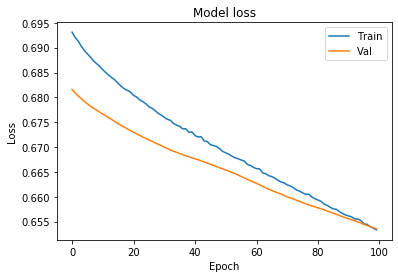

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

to plot our training accuracy and validation accuracy:

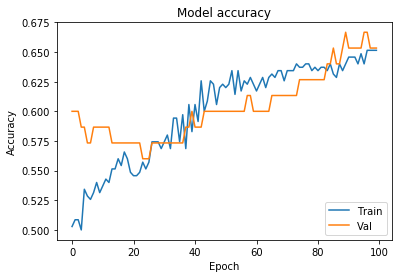

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Adding Regularization to our Neural Network

Here, we’ve made a much larger model and we’ve use the Adam optimizer. Adam is one of the most common optimizers. It reaches the lower loss function faster. 

In [39]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(11,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 350 samples, validate on 75 samples
Epoch 1/100
350/350 [==============================] - 4s 11ms/sample - loss: 0.6858 - accuracy: 0.5714 - val_loss: 0.6635 - val_accuracy: 0.6000
Epoch 2/100
350/350 [==============================] - 1s 2ms/sample - loss: 0.6373 - accuracy: 0.6286 - val_loss: 0.6482 - val_accuracy: 0.6267
Epoch 3/100
350/350 [==============================] - 1s 2ms/sample - loss: 0.6147 - accuracy: 0.6514 - val_loss: 0.6563 - val_accuracy: 0.6133
Epoch 4/100
350/350 [==============================] - 1s 2ms/sample - loss: 0.5861 - accuracy: 0.6857 - val_loss: 0.6517 - val_accuracy: 0.6533
Epoch 5/100
350/350 [==============================] - ETA: 0s - loss: 0.5863 - accuracy: 0.68 - 1s 2ms/sample - loss: 0.5913 - accuracy: 0.6829 - val_loss: 0.6724 - val_accuracy: 0.6533
Epoch 6/100
350/350 [==============================] - 1s 2ms/sample - loss: 0.5687 - accuracy: 0.6886 - val_loss: 0.6754 - val_accuracy: 0.6267
Epoch 7/100
350/350 [=====================

In [40]:
model_2.evaluate(X_test, Y_test)[1]

75/75 [==============================] - 0s 503us/sample - loss: 3.4016 - accuracy: 0.6133


0.61333334

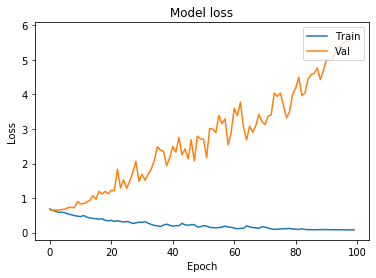

In [41]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

here we see the loss curves for the model

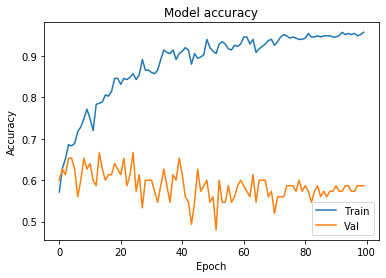

In [42]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

to reduce over-fitting we’ll use L2 regularization and dropout here.

In [44]:
#import the code that we need for L2 regularization and dropout:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

specify our third model like this:

In [45]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(11,)), Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [46]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 350 samples, validate on 75 samples
Epoch 1/100
350/350 [==============================] - 4s 12ms/sample - loss: 23.9478 - accuracy: 0.5229 - val_loss: 16.6351 - val_accuracy: 0.5333
Epoch 2/100
350/350 [==============================] - 1s 3ms/sample - loss: 12.3734 - accuracy: 0.5400 - val_loss: 8.1323 - val_accuracy: 0.5333
Epoch 3/100
350/350 [==============================] - 1s 3ms/sample - loss: 5.8932 - accuracy: 0.5400 - val_loss: 3.7634 - val_accuracy: 0.5333
Epoch 4/100
350/350 [==============================] - 1s 3ms/sample - loss: 2.7383 - accuracy: 0.5400 - val_loss: 1.8072 - val_accuracy: 0.5333
Epoch 5/100
350/350 [==============================] - 1s 3ms/sample - loss: 1.3995 - accuracy: 0.5400 - val_loss: 1.0469 - val_accuracy: 0.5333
Epoch 6/100
350/350 [==============================] - 1s 3ms/sample - loss: 0.9075 - accuracy: 0.5400 - val_loss: 0.7933 - val_accuracy: 0.5333
Epoch 7/100
350/350 [==============================] - 1s 3ms/sample - loss: 0.75

the loss is a lot higher at the start and that’s because we’ve changed our loss function.

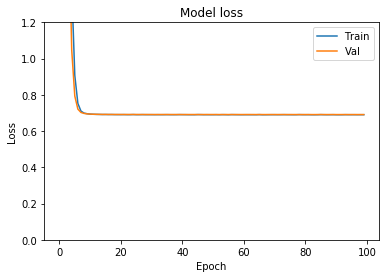

In [48]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

we can see that the validation loss much more closely matches our training loss. 

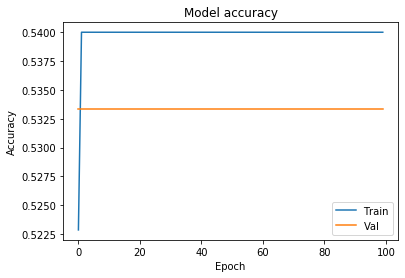

In [49]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Compared to our model in Model 2, we’ve reduced overfitting.

***